In [140]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np

pd.set_option("display.precision", 1)

In [141]:
cols = ['name', 'count', 'time', 'time_units', 'memo', 'memo_units', 'allocs', 'allocs_units']
df = pd.read_csv("./benchmark/memo6.txt", skiprows=4, skipfooter=2, delimiter='\s+', names=cols)

/home/user/miniconda3/envs/tft/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [142]:
print(df.columns)

Index(['name', 'count', 'time', 'time_units', 'memo', 'memo_units', 'allocs',
       'allocs_units'],
      dtype='object')


In [143]:
op = np.array(list(map(lambda x: re.split(r'[//-]', re.sub(r'[#_-]', '/', x), flags=re.I)[0:2], df['name'].values)), dtype=str)
df['op'], df['fn'] = op[:, 0], op[:, 1]

In [144]:
f = 1e-6
df['time'] *= f

In [145]:
stat_raw = []
label = ['op', 'fn', 'mean', 'min', 'max', 'q25', 'q50', 'q75']
for i, g in df.groupby(['op']):
    for j, v in g.groupby(['fn']):
        row = v['time'].to_numpy()
        stat_raw.append([
            i, j,
            row.mean(), row.min(), row.max(),
            np.percentile(row, 25), np.percentile(row, 50),
            np.percentile(row, 75)
        ])
stat = pd.DataFrame(columns=label, data=stat_raw)

In [146]:
stat.head()

,op,fn,mean,min,max,q25,q50,q75
0,BenchmarkDfsMemoOp,TopK,1.7e+01,8.9e+00,4.4e+01,1.3e+01,1.4e+01,1.5e+01
1,BenchmarkDfsMemoOp,TopKOneToMany,7.1e+01,1.3e+01,1.8e+02,2.9e+01,5.1e+01,1.1e+02
2,BenchmarkDfsMemoOp,TopKOneToOne,1.4e+02,8.0e+00,3.2e+02,7.2e+01,1.3e+02,1.9e+02
3,BenchmarkMultiGraph,UpdateRelation,2.2e-08,1.9e-08,2.7e-08,2.0e-08,2.2e-08,2.4e-08


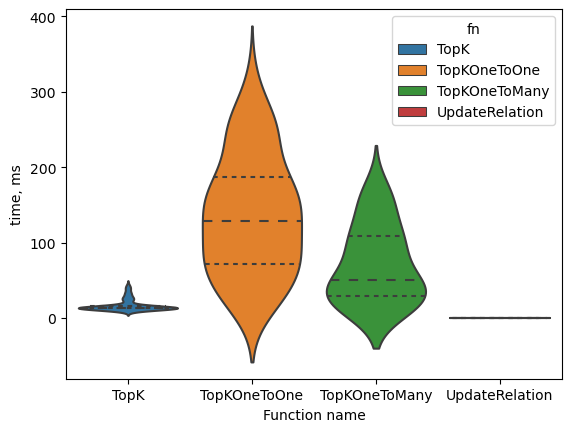

In [149]:
ax = sns.violinplot(y="time", x="fn", data=df, hue='fn', inner="quartile", dodge=False)
ax.set(xlabel='Function name', ylabel='time, ms')
plt.show()